In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "cm",
      "font.size" : "12",
      "figure.figsize" : [8,8]}
plt.rcParams.update(rc)

%config InlineBackend.figure_format='retina'

In [2]:
#0 = sunny, 1 = cloudy
N_tries = int(1e4)
forecast = [1]

In [3]:
day = forecast[0]
for n in tqdm(range(N_tries)):
    if day == 0:
        new_day = np.random.choice([0, 1], p = [0.9, 0.1])
    if day == 1:
        new_day = np.random.choice([0, 1], p = [0.5, 0.5])
    forecast.append(new_day)
    day = new_day
forecast = np.array(forecast, dtype = 'int')

  0%|          | 0/10000 [00:00<?, ?it/s]

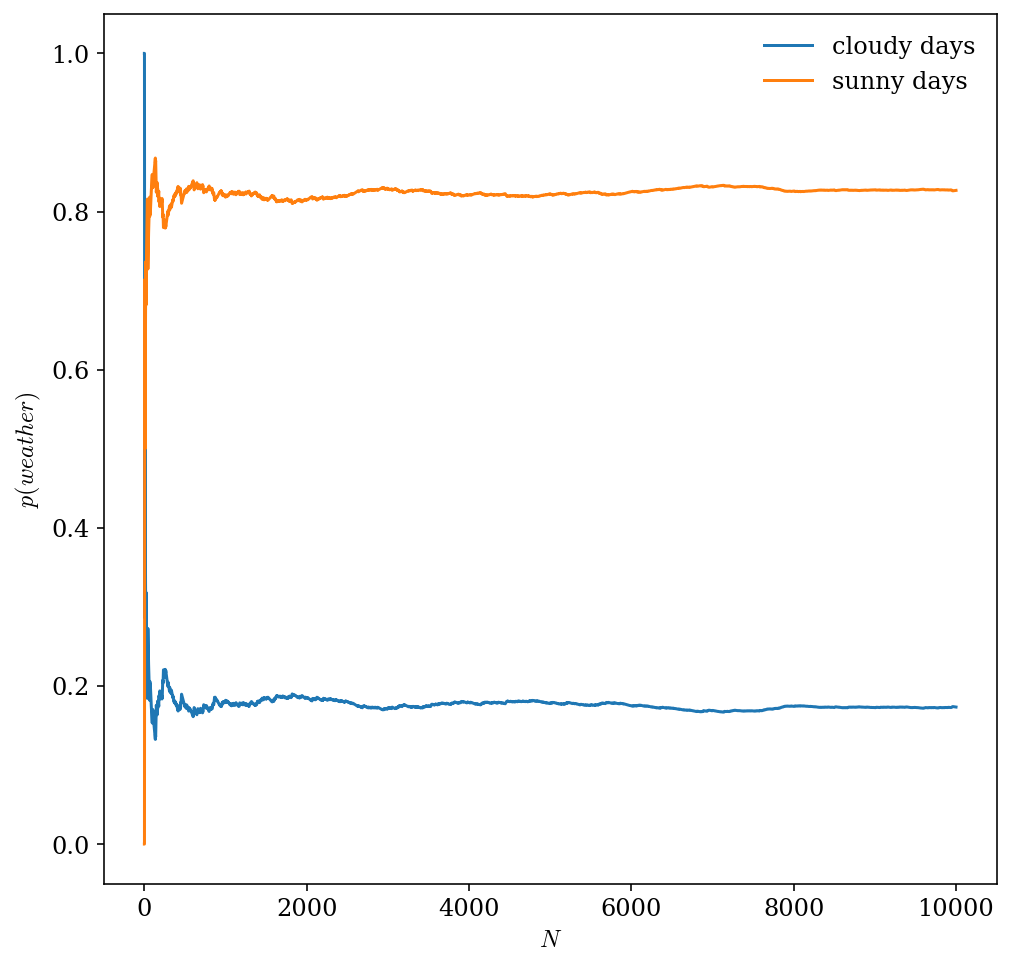

In [40]:
N_grid = np.arange(1, N_tries + 2, 1)
cumulative = np.cumsum(forecast)
sunny_days = 1 - cumulative / N_grid
cloudy_days = cumulative / N_grid

plt.plot(N_grid, cloudy_days, label = 'cloudy days')
plt.plot(N_grid, sunny_days, label = 'sunny days')
plt.xlabel(r'$N$')
plt.ylabel(r'$p(weather)$')
plt.legend(frameon = False)
plt.show()

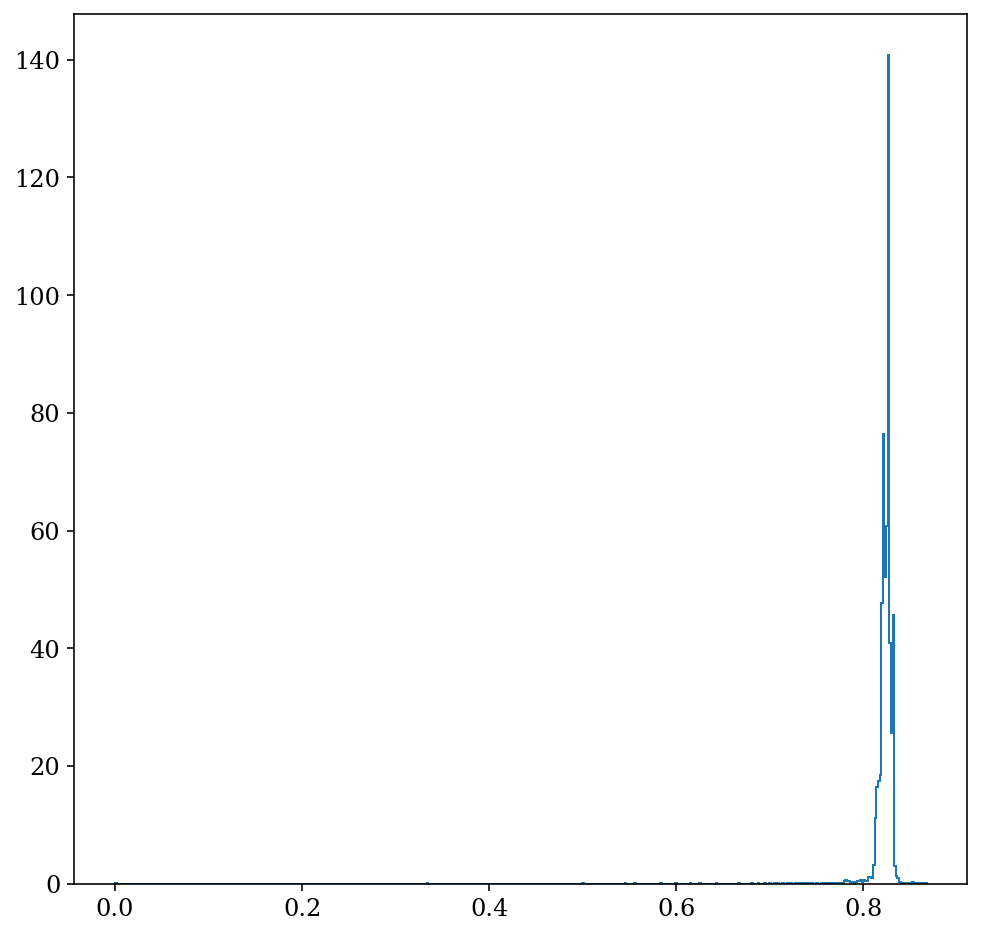

In [41]:
plt.hist(sunny_days, bins = 500, density = True, histtype = 'step')
plt.show()

## remove the memory of the initial choice

In [42]:
burn = 1000
sunny_days = sunny_days[burn:]

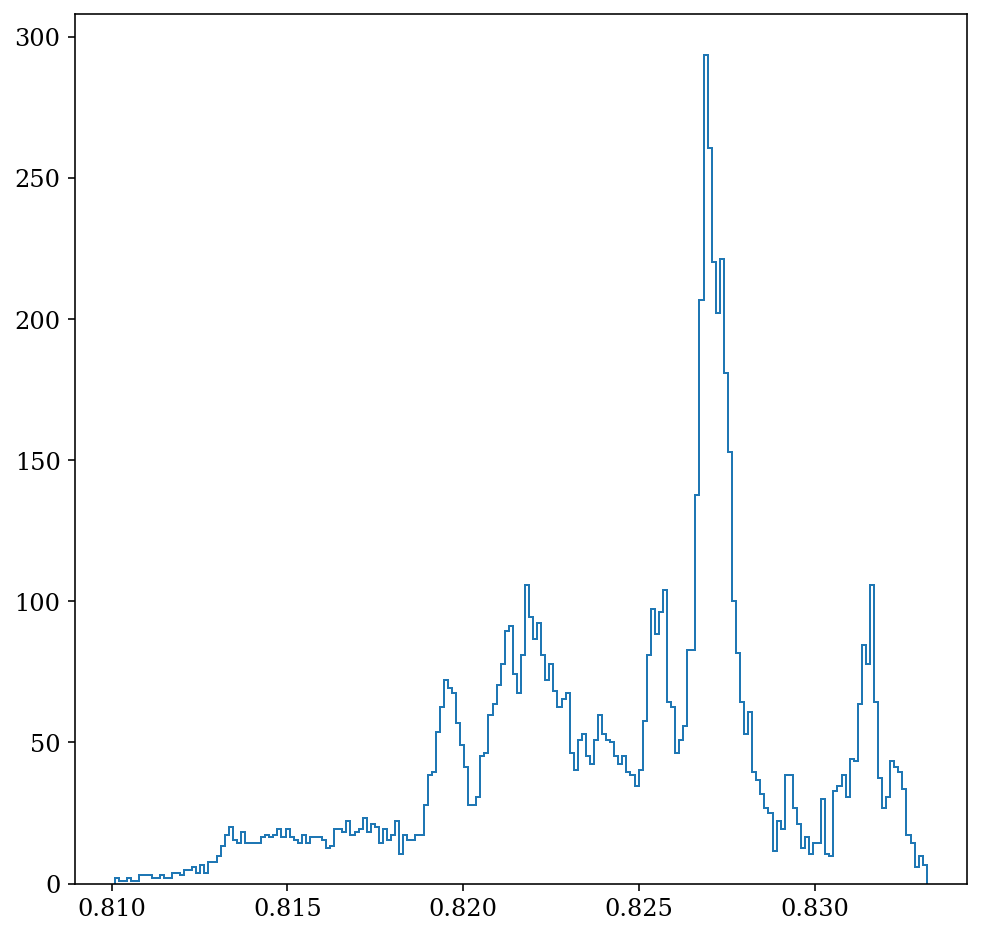

In [43]:
plt.hist(sunny_days, bins = 200, density = True, histtype = 'step')
plt.show()